In [1]:
library("Seurat")

Attaching SeuratObject



In [6]:
load("/data/severs/NeoLetExe_five_triplets.RData")

In [8]:
ls()

[1] "Subset_Cells"

In [15]:
Subset_Cells

An object of class Seurat 
33562 features across 94231 samples within 1 assay 
Active assay: RNA (33562 features, 0 variable features)
 2 dimensional reductions calculated: pca, umap

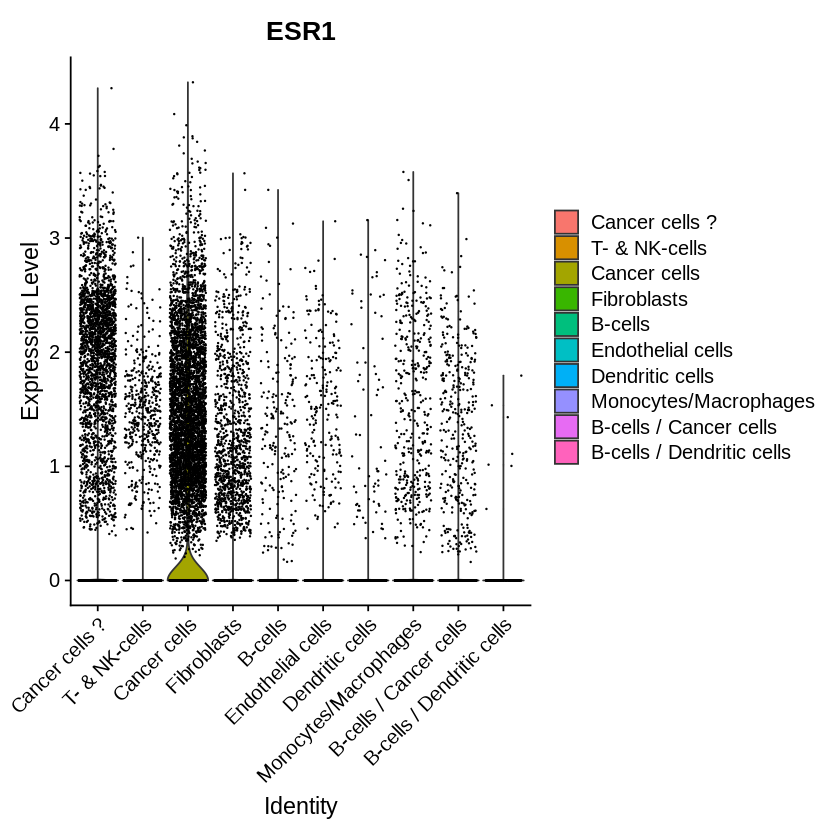

In [18]:
VlnPlot(object = Subset_Cells, features = c("ESR1"))

In [11]:
meta_data <- data.frame(Subset_Cells@meta.data)

In [14]:
write.csv(meta_data, "/data/severs/NeoLet_metadata.csv", row.names=TRUE)